In [33]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests

import nltk
from sklearn.manifold import TSNE
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import string
import re
import scipy.stats as stats
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as smote_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import PassiveAggressiveClassifier

import pickle

import warnings
warnings.filterwarnings("ignore")

np.random.seed(7)

# Importing Data Sources

In [2]:
df_KaggleTrain = pd.read_csv('data/KaggleTrain.csv')

In [3]:
#1: unreliable
#0: reliable
df_KaggleTrain

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [4]:
df_KaggleTrain.drop(['author', 'id'], axis=1, inplace=True)
df_KaggleTrain['source'] = 'Kaggle'
df_KaggleTrain

title  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...   
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                      Why the Truth Might Get You Fired   
3      15 Civilians Killed In Single US Airstrike Hav...   
4      Iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799                          What Keeps the F-35 Alive   

                                                    text  label  source  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  Kaggle  
1      Ever get the feeling your life circles the rou...      0  Kaggle  
2      Why the Truth Might Get You Fired October 29, ...      1  Kaggle  
3      Videos 15 Civilians Killed In Single US Airstr...      1  Kaggle  
4      Print \nAn Iranian woman has been sentenced to...      1  Kaggle  
...                                                  ...    ...     ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  Kaggle  
20796  When the Green Bay Packers lost to the Washing...      0  Kaggle  
20797  The Macy’s of today grew from the union of sev...      0  Kaggle  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  Kaggle  
20799    David Swanson is an author, activist, journa...      1  Kaggle  

[20800 rows x 4 columns]

In [5]:
df_DataFlair = pd.read_csv('data/DataFlairnews.csv')

In [6]:
df_DataFlair

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4     It's primary day in New York and front-runners...  REAL  
...                                                 ...   ...  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  

[6335 rows x 4 columns]

In [7]:
df_DataFlair['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
df_DataFlair.drop('Unnamed: 0', axis=1, inplace=True)
df_DataFlair['source'] = 'DataFlair'
df_DataFlair

title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label     source  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  DataFlair  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  DataFlair  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  DataFlair  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  DataFlair  
4     It's primary day in New York and front-runners...  REAL  DataFlair  
...                                                 ...   ...        ...  
6330  The State Department told the Republican Natio...  REAL  DataFlair  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  DataFlair  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  DataFlair  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  DataFlair  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  DataFlair  

[6335 rows x 4 columns]

In [9]:
df_ISOT_true = pd.read_csv('data/ISOTTrue.csv')
df_ISOT_false = pd.read_csv('data/ISOTFake.csv')

In [10]:
df_ISOT_false

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [11]:
df_ISOT_true

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [12]:
df_ISOT_true['label'] = 0
df_ISOT_true['source'] = 'ISOT'
df_ISOT_false['label'] = 1
df_ISOT_false['source'] = 'ISOT'
df_ISOT_true.drop(['subject', 'date'], axis=1, inplace=True)
df_ISOT_false.drop(['subject', 'date'], axis=1, inplace=True)

# Final Dataframe

ISOT - focused mostly on collecting articles from 2016 to 2017. https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php <br>
Kaggle - https://www.kaggle.com/c/fake-news/overview <br>
Dataflair - https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

In [13]:
dfList = [df_ISOT_true, df_ISOT_false, df_DataFlair, df_KaggleTrain]
df_MAIN = pd.concat(dfList, ignore_index=True)
df_MAIN

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT  
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT  
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT  
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT  
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT  
...                                                  ...   ...     ...  
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle  
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle  
72030  The Macy’s of today grew from the union of sev...     0  Kaggle  
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle  
72032    David Swanson is an author, activist, journa...     1  Kaggle  

[72033 rows x 4 columns]

In [14]:
df_MAIN['label'].value_counts()

1       33894
0       31804
REAL     3171
FAKE     3164
Name: label, dtype: int64

In [15]:
#0 = True
#1 = False

conditions = [
    df_MAIN['label'] == 1, 
    df_MAIN['label'] == 0,
    df_MAIN['label'] == 'REAL',
    df_MAIN['label'] == 'FAKE'
]

choices = [
    1, 
    0, 
    0,
    1
]

df_MAIN['label'] = np.select(conditions, choices, default='NA')
df_MAIN['label'].value_counts()

1    37058
0    34975
Name: label, dtype: int64

In [16]:
df = df_MAIN
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT  
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT  
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT  
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT  
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT  
...                                                  ...   ...     ...  
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle  
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle  
72030  The Macy’s of today grew from the union of sev...     0  Kaggle  
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle  
72032    David Swanson is an author, activist, journa...     1  Kaggle  

[72033 rows x 4 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72033 entries, 0 to 72032
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71475 non-null  object
 1   text    71994 non-null  object
 2   label   72033 non-null  object
 3   source  72033 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [18]:
df.dropna(axis=0, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71436 entries, 0 to 72032
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71436 non-null  object
 1   text    71436 non-null  object
 2   label   71436 non-null  object
 3   source  71436 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [20]:
#removing Reuters heading

def reuters(text):
    reuters = '(Reuters) - '
    if reuters in text:
        return text[text.find(reuters)+len(reuters):]
    else:
        return text

df['text_cleaned'] = df['text'].apply(reuters)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  
0      The head of a conservative Republican faction ...  
1      Transgender people will be allowed for the fir...  
2      The special counsel investigation of links bet...  
3      Trump campaign adviser George Papadopoulos tol...  
4      President Donald Trump called on the U.S. Post...  
...                                                  ...  
72028  Rapper T. I. unloaded on black celebrities who...  
72029  When the Green Bay Packers lost to the Washing...  
72030  The Macy’s of today grew from the union of sev...  
72031  NATO, Russia To Hold Parallel Exercises In Bal...  
72032    David Swanson is an author, activist, journa...  

[71436 rows x 5 columns]

In [21]:
punct = set(string.punctuation)

def tokenize_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in punct]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return nltk.word_tokenize(text_no_doublespace)

df['text_cleaned_tokenized'] = df['text_cleaned'].apply(tokenize_text)
#text_cleaned column has no reuters heading, stop words, numbers, punctuation or whitespaces
df['text_cleaned'] = df['text_cleaned_tokenized'].apply(' '.join)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      the head of a conservative republican faction ...   
1      transgender people will be allowed for the fir...   
2      the special counsel investigation of links bet...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called on the us postal...   
...                                                  ...   
72028  rapper t i unloaded on black celebrities who m...   
72029  when the green bay packers lost to the washing...   
72030  the macy ’ s of today grew from the union of s...   
72031  nato russia to hold parallel exercises in balk...   
72032  david swanson is an author activist journalist...   

                                  text_cleaned_tokenized  
0      [the, head, of, a, conservative, republican, f...  
1      [transgender, people, will, be, allowed, for, ...  
2      [the, special, counsel, investigation, of, lin...  
3      [trump, campaign, adviser, george, papadopoulo...  
4      [president, donald, trump, called, on, the, us...  
...                                                  ...  
72028  [rapper, t, i, unloaded, on, black, celebritie...  
72029  [when, the, green, bay, packers, lost, to, the...  
72030  [the, macy, ’, s, of, today, grew, from, the, ...  
72031  [nato, russia, to, hold, parallel, exercises, ...  
72032  [david, swanson, is, an, author, activist, jou...  

[71436 rows x 6 columns]

In [17]:
#removing stopwords
words = stopwords.words("english")
custom_words = ['’', '“', '”', '—', '‘']
for i in custom_words:
    words.append(i)
words = set(words)

df['text_tokenized_string'] = df['text_cleaned_tokenized'].apply(lambda x: [item for item in x if item not in words])
df['text_tokenized_string'] = df['text_tokenized_string'].apply(' '.join)
df

In [23]:
#POS tagging to lemmatize text
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_text(text):
    #tokenize text and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(text))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_text = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_text.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_text.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_text)

# Lemmatizing
df['text_pos_lemmatized'] = df['text_tokenized_string'].apply(lambda x: lemmatize_text(x))
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      the head of a conservative republican faction ...   
1      transgender people will be allowed for the fir...   
2      the special counsel investigation of links bet...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called on the us postal...   
...                                                  ...   
72028  rapper t i unloaded on black celebrities who m...   
72029  when the green bay packers lost to the washing...   
72030  the macy ’ s of today grew from the union of s...   
72031  nato russia to hold parallel exercises in balk...   
72032  david swanson is an author activist journalist...   

                                  text_cleaned_tokenized  \
0      [the, head, of, a, conservative, republican, f...   
1      [transgender, people, will, be, allowed, for, ...   
2      [the, special, counsel, investigation, of, lin...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, on, the, us...   
...                                                  ...   
72028  [rapper, t, i, unloaded, on, black, celebritie...   
72029  [when, the, green, bay, packers, lost, to, the...   
72030  [the, macy, ’, s, of, today, grew, from, the, ...   
72031  [nato, russia, to, hold, parallel, exercises, ...   
72032  [david, swanson, is, an, author, activist, jou...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                     text_pos_lemmatized  
0      head conservative republican faction us congre...  
1      transgender people allow first time enlist us ...  
2      special counsel investigation link russia pres...  
3      trump campaign adviser george papad

In [24]:
stemmer = SnowballStemmer('english')

df['text_snowball_stemmed'] = df['text_cleaned_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      the head of a conservative republican faction ...   
1      transgender people will be allowed for the fir...   
2      the special counsel investigation of links bet...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called on the us postal...   
...                                                  ...   
72028  rapper t i unloaded on black celebrities who m...   
72029  when the green bay packers lost to the washing...   
72030  the macy ’ s of today grew from the union of s...   
72031  nato russia to hold parallel exercises in balk...   
72032  david swanson is an author activist journalist...   

                                  text_cleaned_tokenized  \
0      [the, head, of, a, conservative, republican, f...   
1      [transgender, people, will, be, allowed, for, ...   
2      [the, special, counsel, investigation, of, lin...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, on, the, us...   
...                                                  ...   
72028  [rapper, t, i, unloaded, on, black, celebritie...   
72029  [when, the, green, bay, packers, lost, to, the...   
72030  [the, macy, ’, s, of, today, grew, from, the, ...   
72031  [nato, russia, to, hold, parallel, exercises, ...   
72032  [david, swanson, is, an, author, activist, jou...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                     text_pos_lemmatized  \
0      head conservative republican faction us congre...   
1      transgender people allow first time enlist us ...   
2      special counsel investigation link russia pres...   
3      trump campaign adviser george p

In [90]:
df['text_snowball_stemmed'] = df['text_snowball_stemmed'].apply(' '.join)

In [25]:
stemmer = PorterStemmer()

df['text_porter_stemmed'] = df['text_cleaned_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      the head of a conservative republican faction ...   
1      transgender people will be allowed for the fir...   
2      the special counsel investigation of links bet...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called on the us postal...   
...                                                  ...   
72028  rapper t i unloaded on black celebrities who m...   
72029  when the green bay packers lost to the washing...   
72030  the macy ’ s of today grew from the union of s...   
72031  nato russia to hold parallel exercises in balk...   
72032  david swanson is an author activist journalist...   

                                  text_cleaned_tokenized  \
0      [the, head, of, a, conservative, republican, f...   
1      [transgender, people, will, be, allowed, for, ...   
2      [the, special, counsel, investigation, of, lin...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, on, the, us...   
...                                                  ...   
72028  [rapper, t, i, unloaded, on, black, celebritie...   
72029  [when, the, green, bay, packers, lost, to, the...   
72030  [the, macy, ’, s, of, today, grew, from, the, ...   
72031  [nato, russia, to, hold, parallel, exercises, ...   
72032  [david, swanson, is, an, author, activist, jou...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                     text_pos_lemmatized  \
0      head conservative republican faction us congre...   
1      transgender people allow first time enlist us ...   
2      special counsel investigation link russia pres...   
3      trump campaign adviser george p

In [91]:
df['text_porter_stemmed'] = df['text_porter_stemmed'].apply(' '.join)

In [26]:
stemmer = LancasterStemmer()

df['text_lancaster_stemmed'] = df['text_cleaned_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      the head of a conservative republican faction ...   
1      transgender people will be allowed for the fir...   
2      the special counsel investigation of links bet...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called on the us postal...   
...                                                  ...   
72028  rapper t i unloaded on black celebrities who m...   
72029  when the green bay packers lost to the washing...   
72030  the macy ’ s of today grew from the union of s...   
72031  nato russia to hold parallel exercises in balk...   
72032  david swanson is an author activist journalist...   

                                  text_cleaned_tokenized  \
0      [the, head, of, a, conservative, republican, f...   
1      [transgender, people, will, be, allowed, for, ...   
2      [the, special, counsel, investigation, of, lin...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, on, the, us...   
...                                                  ...   
72028  [rapper, t, i, unloaded, on, black, celebritie...   
72029  [when, the, green, bay, packers, lost, to, the...   
72030  [the, macy, ’, s, of, today, grew, from, the, ...   
72031  [nato, russia, to, hold, parallel, exercises, ...   
72032  [david, swanson, is, an, author, activist, jou...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                     text_pos_lemmatized  \
0      head conservative republican faction us congre...   
1      transgender people allow first time enlist us ...   
2      special counsel investigation link russia pres...   
3      trump campaign adviser george p

In [92]:
df['text_lancaster_stemmed'] = df['text_lancaster_stemmed'].apply(' '.join)

In [ ]:
# POS tagging
df['text_pos_tagged'] = df['text_cleaned_tokenized'].apply(pos_tag)

# TAKES A LONG TIME; COMMENTING OUT FOR NOW

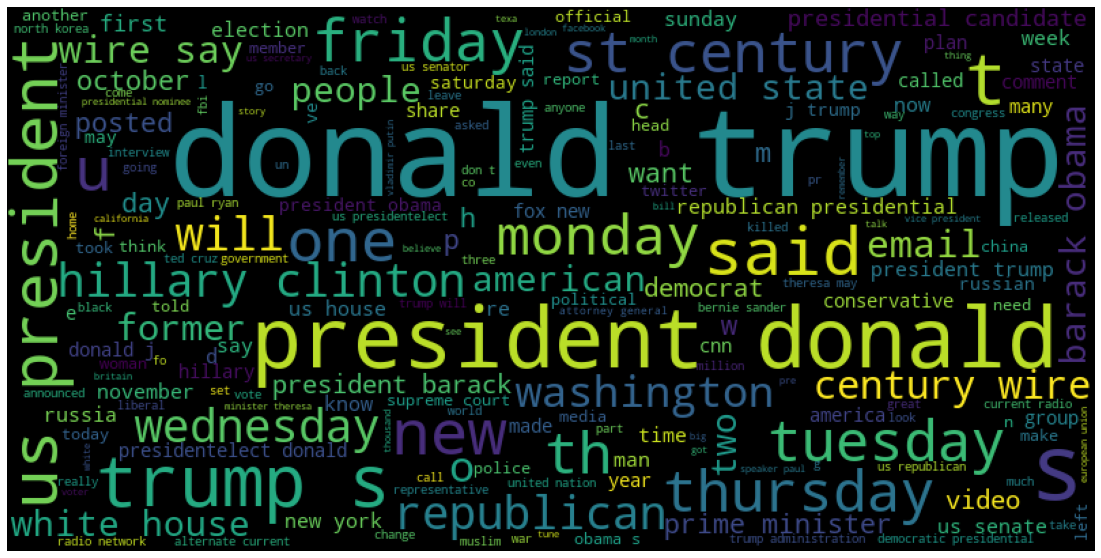

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20,10))

#convert list to string and generate
text = WordCloud(width=800, height=400).generate(df['text_cleaned'].to_string())
plt.imshow(text)
plt.axis("off")
plt.show()

In [29]:
articles_concat = []

for text in df['text_cleaned_tokenized']:
    articles_concat += text

articles_concat

['the',
 'head',
 'of',
 'a',
 'conservative',
 'republican',
 'faction',
 'in',
 'the',
 'us',
 'congress',
 'who',
 'voted',
 'this',
 'month',
 'for',
 'a',
 'huge',
 'expansion',
 'of',
 'the',
 'national',
 'debt',
 'to',
 'pay',
 'for',
 'tax',
 'cuts',
 'called',
 'himself',
 'a',
 '“',
 'fiscal',
 'conservative',
 '”',
 'on',
 'sunday',
 'and',
 'urged',
 'budget',
 'restraint',
 'in',
 'in',
 'keeping',
 'with',
 'a',
 'sharp',
 'pivot',
 'under',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'on',
 'cbs',
 '’',
 '“',
 'face',
 'the',
 'nation',
 '”',
 'drew',
 'a',
 'hard',
 'line',
 'on',
 'federal',
 'spending',
 'which',
 'lawmakers',
 'are',
 'bracing',
 'to',
 'do',
 'battle',
 'over',
 'in',
 'january',
 'when',
 'they',
 'return',
 'from',
 'the',
 'holidays',
 'on',
 'wednesday',
 'lawmakers',
 'will',
 'begin',
 'trying',
 'to',
 'pass',
 'a',
 'federal',
 'budget',
 'in',
 'a',
 'fight',
 'likely',
 'to',
 'be',
 'lin

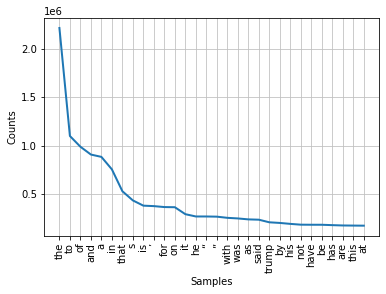

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.plot(30,cumulative=False)

In [31]:
display(articles_freqdist.most_common(200))

[('the', 2217954),
 ('to', 1098562),
 ('of', 987316),
 ('and', 906308),
 ('a', 882106),
 ('in', 752777),
 ('that', 526098),
 ('s', 430816),
 ('is', 376643),
 ('’', 371894),
 ('for', 362101),
 ('on', 360444),
 ('it', 288288),
 ('he', 264594),
 ('“', 264484),
 ('”', 262676),
 ('with', 250511),
 ('was', 244258),
 ('as', 234437),
 ('said', 231159),
 ('trump', 204174),
 ('by', 197608),
 ('his', 187820),
 ('not', 179595),
 ('have', 178795),
 ('be', 178687),
 ('has', 174762),
 ('are', 171332),
 ('this', 170205),
 ('at', 169292),
 ('from', 169056),
 ('i', 158322),
 ('they', 151617),
 ('an', 146288),
 ('who', 143203),
 ('but', 141034),
 ('we', 133410),
 ('you', 119048),
 ('about', 106556),
 ('their', 106121),
 ('will', 105973),
 ('would', 104823),
 ('had', 101948),
 ('us', 101110),
 ('or', 98870),
 ('t', 95760),
 ('been', 90882),
 ('more', 89625),
 ('people', 88959),
 ('were', 88731),
 ('she', 87617),
 ('president', 85000),
 ('one', 84783),
 ('her', 83975),
 ('which', 81743),
 ('all', 78749),
 

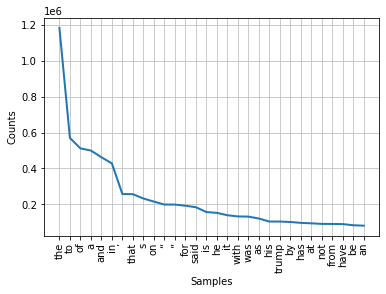

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
#frequency distribution for TRUE articles

articles_concat_true = []

for text in df[df['label']=='0']['text_cleaned_tokenized']:
    articles_concat_true += text

articles_concat_true

articles_freqdist = FreqDist(articles_concat_true)
articles_freqdist.plot(30,cumulative=False)

In [33]:
display(articles_freqdist.most_common(200))

[('the', 1181732),
 ('to', 570169),
 ('of', 511901),
 ('a', 499757),
 ('and', 462537),
 ('in', 428133),
 ('’', 257732),
 ('that', 256907),
 ('s', 232897),
 ('on', 215655),
 ('“', 199463),
 ('”', 199197),
 ('for', 192759),
 ('said', 184405),
 ('is', 157658),
 ('he', 153088),
 ('it', 139800),
 ('with', 133172),
 ('was', 132184),
 ('as', 121573),
 ('his', 104760),
 ('trump', 104695),
 ('by', 102238),
 ('has', 97336),
 ('at', 94858),
 ('not', 91650),
 ('from', 91226),
 ('have', 90566),
 ('be', 84091),
 ('an', 81758),
 ('but', 79664),
 ('who', 75626),
 ('i', 75207),
 ('are', 73544),
 ('they', 68467),
 ('had', 65925),
 ('mr', 65917),
 ('this', 63861),
 ('would', 62123),
 ('we', 59373),
 ('will', 52921),
 ('us', 52065),
 ('about', 51974),
 ('were', 49204),
 ('president', 49159),
 ('their', 48898),
 ('been', 47645),
 ('more', 47472),
 ('she', 46695),
 ('or', 46628),
 ('—', 45768),
 ('which', 45406),
 ('its', 44351),
 ('her', 41863),
 ('one', 41549),
 ('after', 41456),
 ('people', 41432),
 ('ne

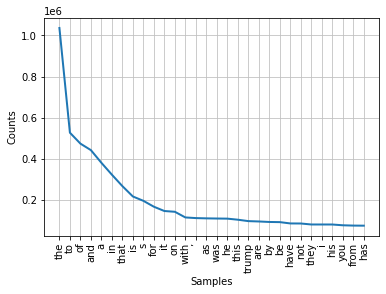

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
#frequency distribution for FAKE articles

articles_concat_true = []

for text in df[df['label']=='1']['text_cleaned_tokenized']:
    articles_concat_true += text

articles_concat_true

articles_freqdist = FreqDist(articles_concat_true)
articles_freqdist.plot(30,cumulative=False)

In [35]:
display(articles_freqdist.most_common(200))

[('the', 1036222),
 ('to', 528393),
 ('of', 475415),
 ('and', 443771),
 ('a', 382349),
 ('in', 324644),
 ('that', 269191),
 ('is', 218985),
 ('s', 197919),
 ('for', 169342),
 ('it', 148488),
 ('on', 144789),
 ('with', 117339),
 ('’', 114162),
 ('as', 112864),
 ('was', 112074),
 ('he', 111506),
 ('this', 106344),
 ('trump', 99479),
 ('are', 97788),
 ('by', 95370),
 ('be', 94596),
 ('have', 88229),
 ('not', 87945),
 ('they', 83150),
 ('i', 83115),
 ('his', 83060),
 ('you', 79308),
 ('from', 77830),
 ('has', 77426),
 ('at', 74434),
 ('we', 74037),
 ('who', 67577),
 ('“', 65021),
 ('an', 64530),
 ('”', 63479),
 ('t', 61586),
 ('but', 61370),
 ('their', 57223),
 ('about', 54582),
 ('will', 53052),
 ('or', 52242),
 ('us', 49045),
 ('all', 48481),
 ('people', 47527),
 ('said', 46754),
 ('what', 46053),
 ('if', 43955),
 ('been', 43237),
 ('one', 43234),
 ('clinton', 43107),
 ('can', 42725),
 ('would', 42700),
 ('more', 42153),
 ('her', 42112),
 ('she', 40922),
 ('were', 39527),
 ('out', 38959)

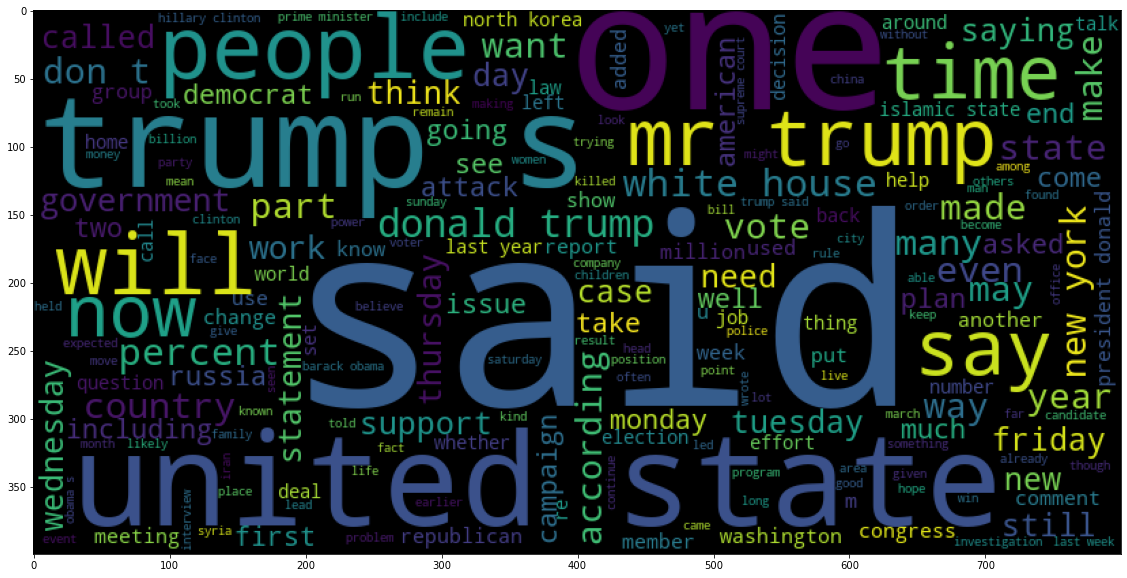

In [36]:
#word cloud for TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[df['label']=='0']['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

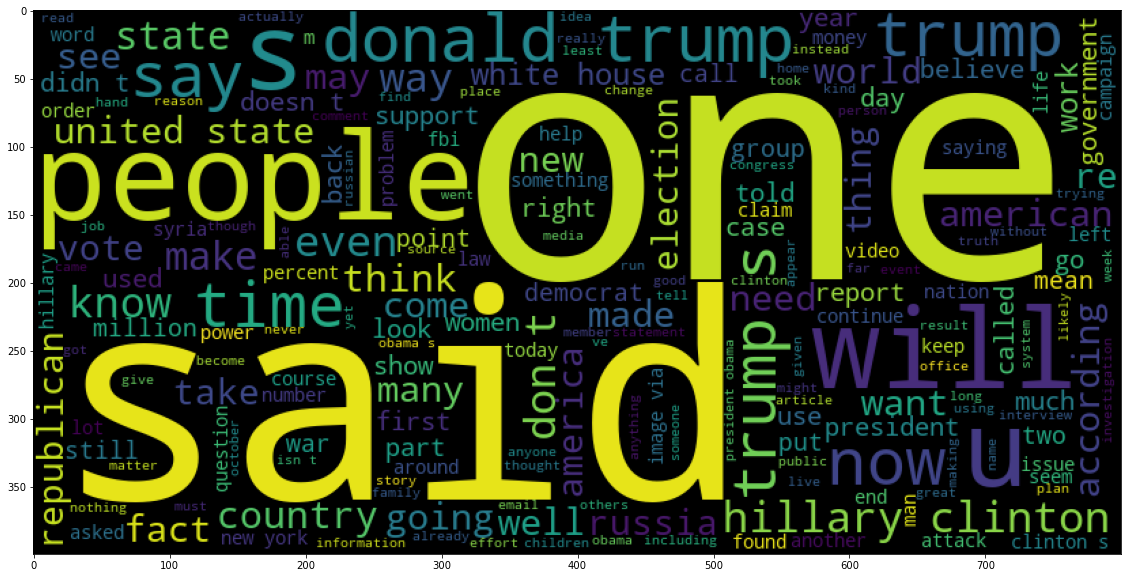

In [37]:
#word cloud for FAKE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[df['label']=='1']['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

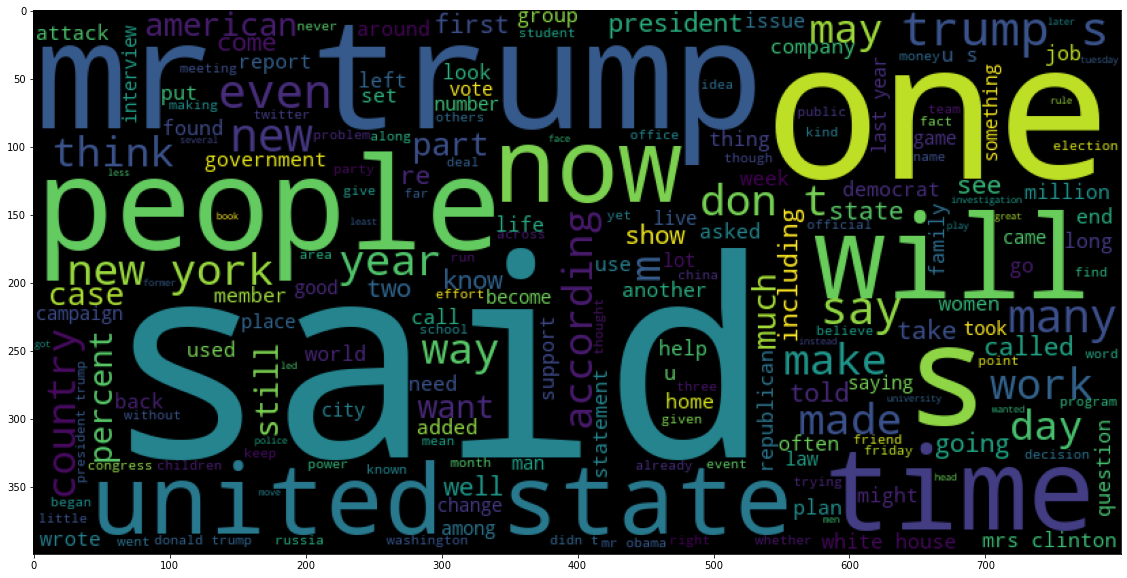

In [38]:
#word cloud for KAGGLE TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='Kaggle') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

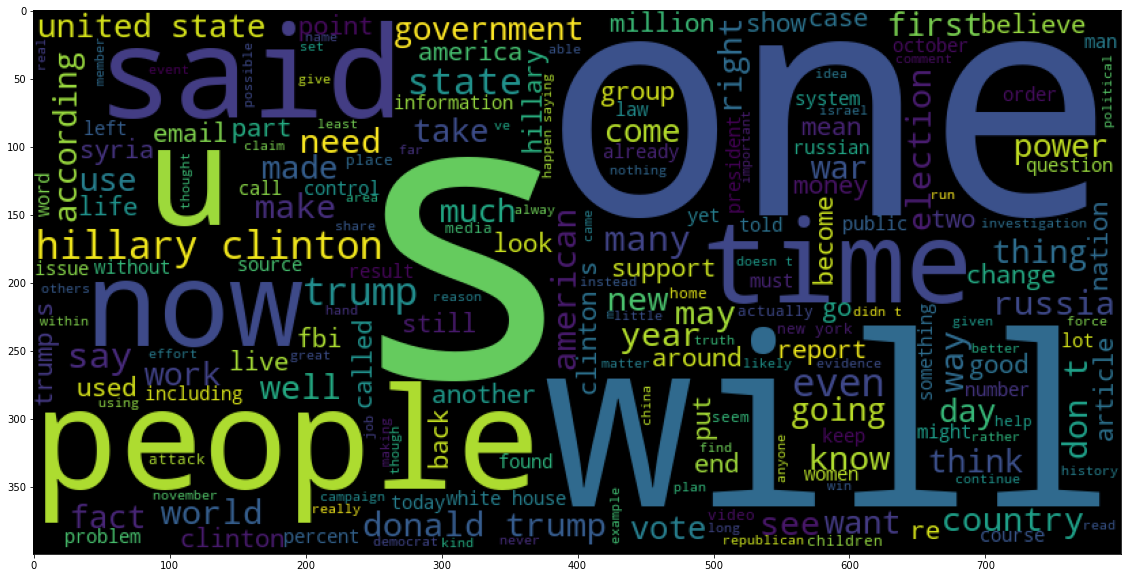

In [39]:
#word cloud for KAGGLE FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='Kaggle') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

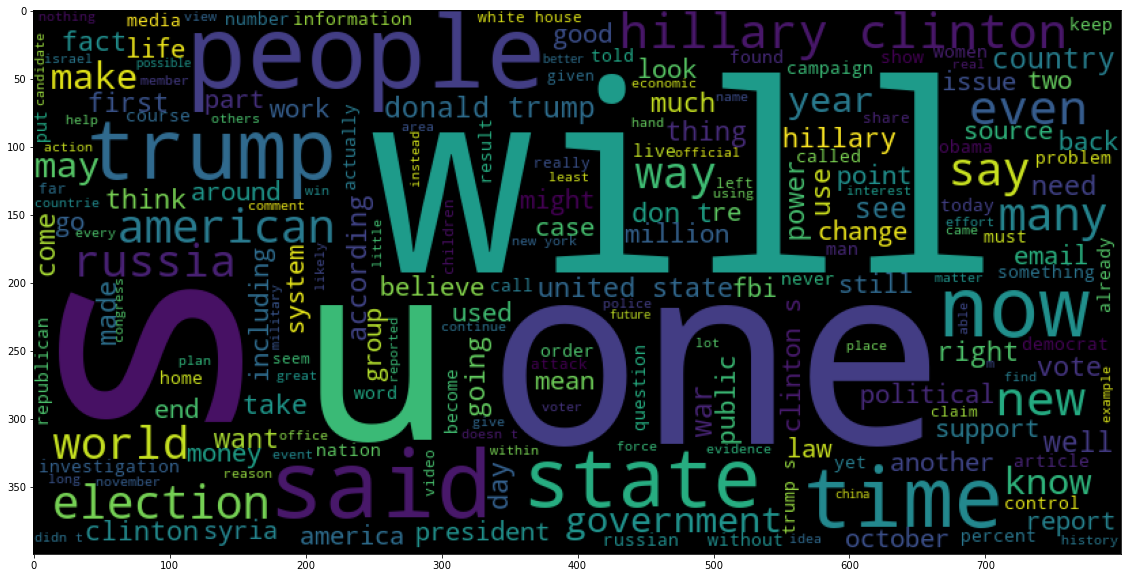

In [40]:
#word cloud for DataFlair FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='DataFlair') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

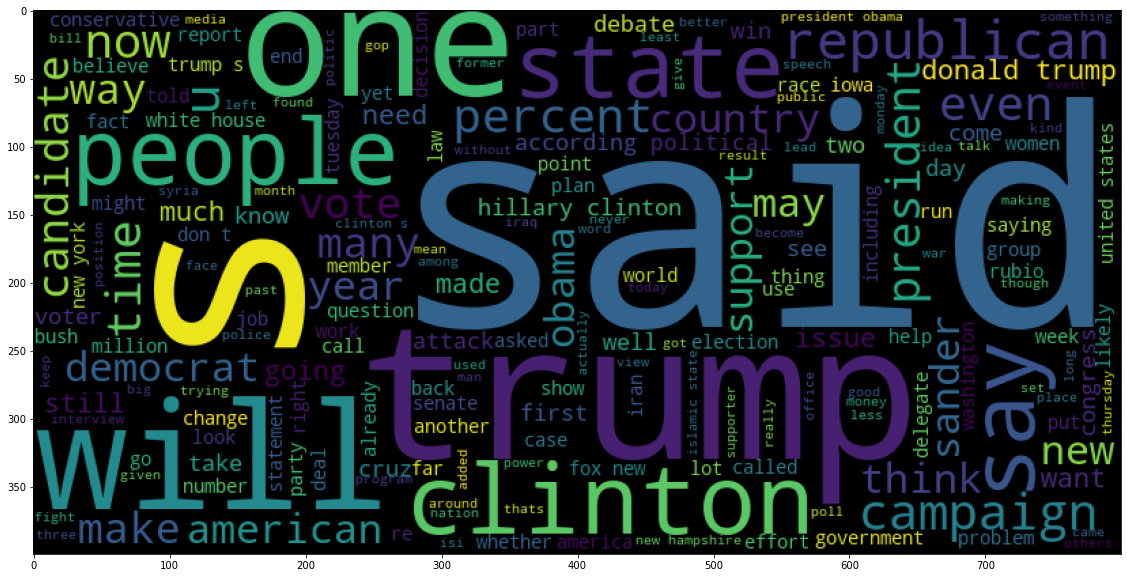

In [41]:
#word cloud for DataFlair TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='DataFlair') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

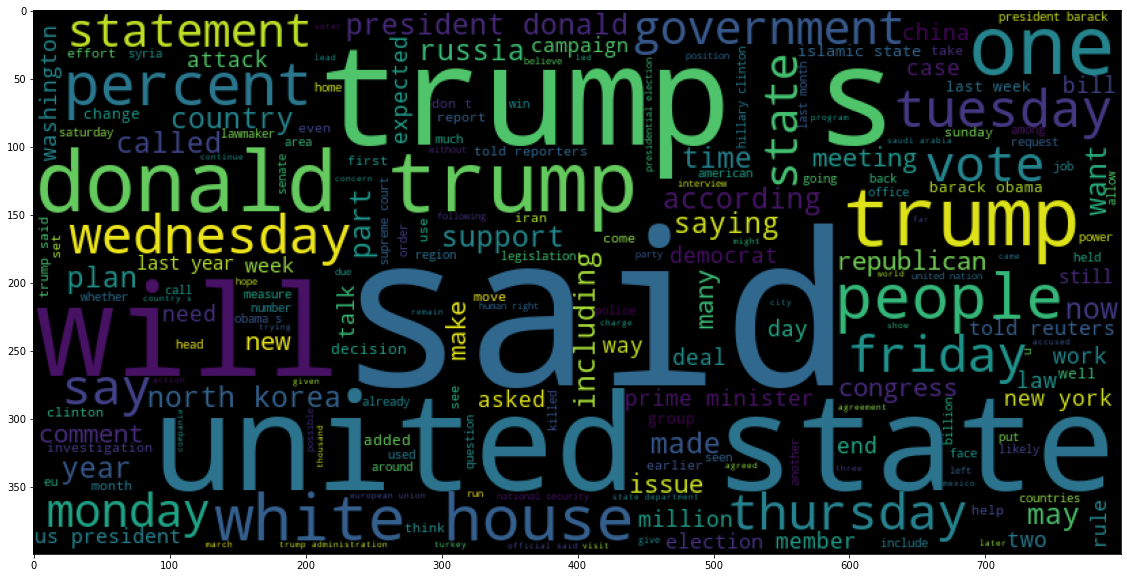

In [42]:
#word cloud for ISOT TRUE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='ISOT') & (df['label']=='0')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

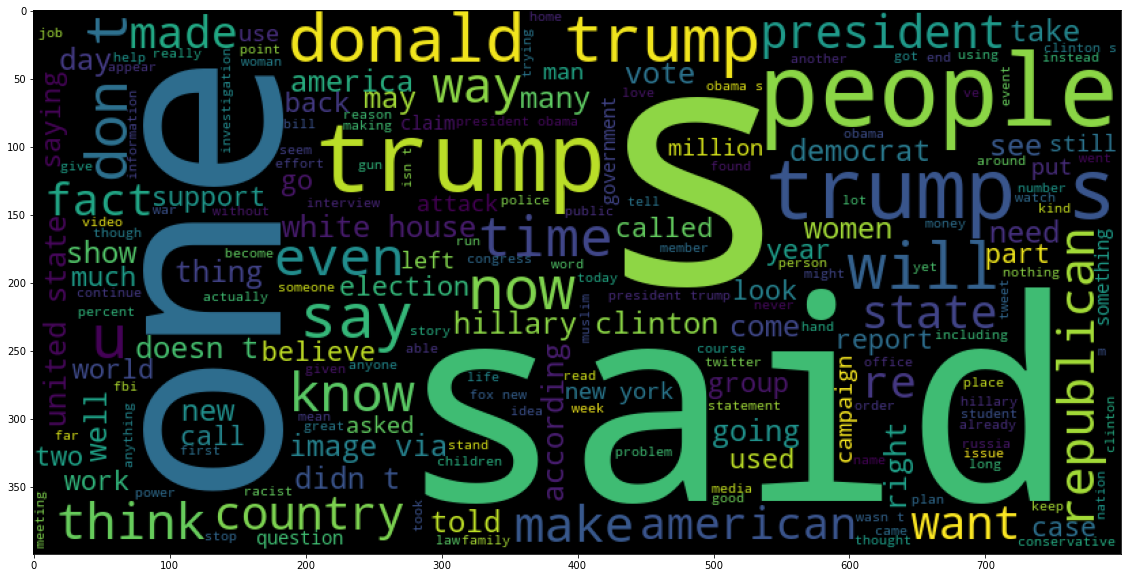

In [43]:
#word cloud for ISOT FALSE articles
plt.figure(figsize=(20,10))

words = ' '.join([Text for Text in df[(df['source']=='ISOT') & (df['label']=='1')]['text_cleaned']])
wordCloud = WordCloud(mode="RGB", width=800 , height=400).generate(words)
plt.imshow(wordCloud)
plt.show()

In [44]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      the head of a conservative republican faction ...   
1      transgender people will be allowed for the fir...   
2      the special counsel investigation of links bet...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called on the us postal...   
...                                                  ...   
72028  rapper t i unloaded on black celebrities who m...   
72029  when the green bay packers lost to the washing...   
72030  the macy ’ s of today grew from the union of s...   
72031  nato russia to hold parallel exercises in balk...   
72032  david swanson is an author activist journalist...   

                                  text_cleaned_tokenized  \
0      [the, head, of, a, conservative, republican, f...   
1      [transgender, people, will, be, allowed, for, ...   
2      [the, special, counsel, investigation, of, lin...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, on, the, us...   
...                                                  ...   
72028  [rapper, t, i, unloaded, on, black, celebritie...   
72029  [when, the, green, bay, packers, lost, to, the...   
72030  [the, macy, ’, s, of, today, grew, from, the, ...   
72031  [nato, russia, to, hold, parallel, exercises, ...   
72032  [david, swanson, is, an, author, activist, jou...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                     text_pos_lemmatized  \
0      head conservative republican faction us congre...   
1      transgender people allow first time enlist us ...   
2      special counsel investigation link russia pres...   
3      trump campaign adviser george p

In [45]:
# average character length of data articles
df['text_cleaned'].str.len().mean()

3183.3873677137576

In [46]:
# average character length of TRUE articles
true_lengths = df[df['label']=='0']['text_cleaned'].str.len()
true_lengths.mean()

3378.430964974982

In [47]:
# average character length of FAKE articles
false_lengths = df[df['label']=='1']['text_cleaned'].str.len()
false_lengths.mean()

2996.29294314473

In [48]:
#t-test

#null = there is no difference in article length between REAL and FAKE
#alternative = there is a difference in article length between REAL and FAKE

stats.ttest_ind(false_lengths.values, true_lengths.values)

#Reject null. There is a difference in article length between REAL and FAKE

Ttest_indResult(statistic=-14.113347529890728, pvalue=3.6152209485785284e-45)

In [50]:
# average word length of data articles
df['text_cleaned_tokenized'].str.len().mean()

552.5512346715941

In [51]:
# average word length of TRUE articles
true_lengths = df[df['label']=='0']['text_cleaned_tokenized'].str.len()
true_lengths.mean()

591.1133095067905

In [52]:
# average word length of FAKE articles
false_lengths = df[df['label']=='1']['text_cleaned_tokenized'].str.len()
false_lengths.mean()

515.5607909821452

In [53]:
#t-test

#null = there is no difference in word length between REAL and FAKE
#alternative = there is a difference in word length between REAL and FAKE

stats.ttest_ind(false_lengths.values, true_lengths.values)

#Reject null. There is a difference in word length between REAL and FAKE

Ttest_indResult(statistic=-15.730964978465492, pvalue=1.1510518081007099e-55)

In [54]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      the head of a conservative republican faction ...   
1      transgender people will be allowed for the fir...   
2      the special counsel investigation of links bet...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called on the us postal...   
...                                                  ...   
72028  rapper t i unloaded on black celebrities who m...   
72029  when the green bay packers lost to the washing...   
72030  the macy ’ s of today grew from the union of s...   
72031  nato russia to hold parallel exercises in balk...   
72032  david swanson is an author activist journalist...   

                                  text_cleaned_tokenized  \
0      [the, head, of, a, conservative, republican, f...   
1      [transgender, people, will, be, allowed, for, ...   
2      [the, special, counsel, investigation, of, lin...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, on, the, us...   
...                                                  ...   
72028  [rapper, t, i, unloaded, on, black, celebritie...   
72029  [when, the, green, bay, packers, lost, to, the...   
72030  [the, macy, ’, s, of, today, grew, from, the, ...   
72031  [nato, russia, to, hold, parallel, exercises, ...   
72032  [david, swanson, is, an, author, activist, jou...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                     text_pos_lemmatized  \
0      head conservative republican faction us congre...   
1      transgender people allow first time enlist us ...   
2      special counsel investigation link russia pres...   
3      trump campaign adviser george p

In [4]:
df = pickle.load(open("Final_df.p", 'rb'))
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
72028  Rapper T.I.: Trump a ’Poster Child For White S...   
72029  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
72030  Macy’s Is Said to Receive Takeover Approach by...   
72031  NATO, Russia To Hold Parallel Exercises In Bal...   
72032                          What Keeps the F-35 Alive   

                                                    text label  source  \
0      WASHINGTON (Reuters) - The head of a conservat...     0    ISOT   
1      WASHINGTON (Reuters) - Transgender people will...     0    ISOT   
2      WASHINGTON (Reuters) - The special counsel inv...     0    ISOT   
3      WASHINGTON (Reuters) - Trump campaign adviser ...     0    ISOT   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...     0    ISOT   
...                                                  ...   ...     ...   
72028  Rapper T. I. unloaded on black celebrities who...     0  Kaggle   
72029  When the Green Bay Packers lost to the Washing...     0  Kaggle   
72030  The Macy’s of today grew from the union of sev...     0  Kaggle   
72031  NATO, Russia To Hold Parallel Exercises In Bal...     1  Kaggle   
72032    David Swanson is an author, activist, journa...     1  Kaggle   

                                            text_cleaned  \
0      the head of a conservative republican faction ...   
1      transgender people will be allowed for the fir...   
2      the special counsel investigation of links bet...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called on the us postal...   
...                                                  ...   
72028  rapper t i unloaded on black celebrities who m...   
72029  when the green bay packers lost to the washing...   
72030  the macy ’ s of today grew from the union of s...   
72031  nato russia to hold parallel exercises in balk...   
72032  david swanson is an author activist journalist...   

                                  text_cleaned_tokenized  \
0      [the, head, of, a, conservative, republican, f...   
1      [transgender, people, will, be, allowed, for, ...   
2      [the, special, counsel, investigation, of, lin...   
3      [trump, campaign, adviser, george, papadopoulo...   
4      [president, donald, trump, called, on, the, us...   
...                                                  ...   
72028  [rapper, t, i, unloaded, on, black, celebritie...   
72029  [when, the, green, bay, packers, lost, to, the...   
72030  [the, macy, ’, s, of, today, grew, from, the, ...   
72031  [nato, russia, to, hold, parallel, exercises, ...   
72032  [david, swanson, is, an, author, activist, jou...   

                                   text_tokenized_string  \
0      head conservative republican faction us congre...   
1      transgender people allowed first time enlist u...   
2      special counsel investigation links russia pre...   
3      trump campaign adviser george papadopoulos tol...   
4      president donald trump called us postal servic...   
...                                                  ...   
72028  rapper unloaded black celebrities met donald t...   
72029  green bay packers lost washington redskins wee...   
72030  macy today grew union several great names amer...   
72031  nato russia hold parallel exercises balkans pr...   
72032  david swanson author activist journalist radio...   

                                     text_pos_lemmatized  \
0      head conservative republican faction us congre...   
1      transgender people allow first time enlist us ...   
2      special counsel investigation link russia pres...   
3      trump campaign adviser george p

# Modeling

## Managing class imbalance

Let's get a refresher on the number of observations we have in each class:

In [5]:
label_counts = df['label'].value_counts()
label_counts

1    36461
0    34975
Name: label, dtype: int64

Great. Before we split the observations to match the "real-world" distribution, let's declare our X and y before we make our imbalanaced dataframe:

In [6]:
X = df[['text', 'text_tokenized_string', 'title', 'label', 'text_pos_lemmatized', 'text_snowball_stemmed', 
        'text_porter_stemmed', 'text_lancaster_stemmed']]
y = df['label']

According to VOX, in 2019, 8 percent of engagement with the 100 top-performing news sources on social media was dubious. In 2020, that number more than doubled to 17 percent. Let's aim to have our training set have an 80/20 split on REAL/FAKE news, to mirror what we'd expect in reality.

https://www.vox.com/policy-and-politics/2020/12/22/22195488/fake-news-social-media-2020  


In [7]:
from imblearn.datasets import make_imbalance

ratio=4
x_imb, y_imb = make_imbalance(X, y, sampling_strategy={'1': label_counts.max() // ratio}, random_state=7)

In [8]:
#preview our new imbalanced data
y_imb.value_counts()

0    34975
1     9115
Name: label, dtype: int64

With this imbalanced dataset, let's train/test split in preparation for the modeling to come.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_imb, y_imb, stratify=y_imb, random_state=7)

## Model Evaluation Tracking

In [10]:
#preview training set class counts
y_train.value_counts()

0    26231
1     6836
Name: label, dtype: int64

In [11]:
#create a dataframe with n_obs in each class. Used in evaluating the accuracy/precisions/recall/etc. of our models.
df_value_counts = pd.DataFrame(y_train.value_counts())
df_value_counts

label
0  26231
1   6836

In [12]:
#create a datafarme to track the various model performances
df_model_results = pd.DataFrame(columns=['Model Type', 'Modeled On', 'CV Score', 'False Negative Rate','True Positive Rate', 
                                         'False Positive Rate', 'True Negative Rate', 'Precision', 'Recall', 'F1 Score'])
df_model_results

Empty DataFrame
Columns: [Model Type, Modeled On, CV Score, False Negative Rate, True Positive Rate, False Positive Rate, True Negative Rate, Precision, Recall, F1 Score]
Index: []

In [13]:
#define a function to run a pipeline on a specified variable, and store the results under the specified model name
def evaluate_store_results(pipeline, variable, model_name):
    #break encapsulation
    global df_model_results
    
    #cross validate with 5 folds and make predictions on training set
    cv_results = np.median(cross_val_score(pipeline, X_train[variable], y_train, cv=5))
    y_pred = cross_val_predict(pipeline, X_train[variable], y_train, cv=5)
    
    #confusion matrix
    c_matrix = confusion_matrix(y_train, y_pred)
    
    #False Negative Rate - when a news article is FAKE, how often does the model predict this to be REAl?
    FNR = c_matrix[1,0] / df_value_counts.iloc[1]['label']

    #True Positive Rate - when a news article is FAKE, how often does the model correctly predict this?
    TPR = c_matrix[1,1] / df_value_counts.iloc[1]['label']

    #False Positive Rate - when a news article is REAL, how often does the model predict it to be FAKE? - WANT TO LOWER THIS A BIT?
    FPR = c_matrix[0,1] / df_value_counts.iloc[0]['label']

    #True Negative Rate - when a news article is REAL, how often does the model predict it to be REAL? - WANT TO INCREASE THIS A BIT?
    TNR = c_matrix[0,0] / df_value_counts.iloc[0]['label']

    #Precision - What proportion of FAKE predictions were actually correct?
    precision = c_matrix[1,1] / (c_matrix[0,1] + c_matrix[1,1])

    #Recall - what proportion of actual FAKE articles were identified?
    recall = c_matrix[1,1] / (c_matrix[1,0] + c_matrix[1,1])

    #F1 score
    f1 = 2*(precision*recall)/(precision+recall)
    
    #save model results
    model_results = {
    'Model Type': model_name,
    'Modeled On': variable, 
    'CV Score': cv_results,
    'False Negative Rate': FNR,
    'True Positive Rate': TPR,
    'False Positive Rate': FPR,
    'True Negative Rate': TNR,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1}

    #append model results
    df_model_results = df_model_results.append(model_results, ignore_index=True)
    return df_model_results

## Baseline Model - `text`

In [64]:
# baseline_model = DummyClassifier(strategy="most_frequent")

pipeline_base = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Dummy Classifier', DummyClassifier(strategy='most_frequent'))])


# baseline_model.fit(tf_idf_train, y_train)

# y_pred = baseline_model.predict(tf_idf_test)

In [65]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline_base, X_train['text'], y_train, cv=5)
c_matrix = confusion_matrix(y_train, y_pred)

In [66]:
evaluate_store_results(pipeline_base, 'text', 'Baseline Model')

<ipython-input-63-309a78476769>:26: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = c_matrix[1,1] / (c_matrix[0,1] + c_matrix[1,1])


Model Type Modeled On  CV Score  False Negative Rate  \
0  Baseline Model       text  0.793286                  1.0   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0                 0.0                  0.0                 1.0        NaN   

   Recall  F1 Score  
0     0.0       NaN

## Multinomial Naive Bayes - `text`

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

pipeline_MNB = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Multinomial Naive Bayes', MultinomialNB())])

In [68]:
evaluate_store_results(pipeline_MNB, 'text', 'Multinomial Naive Bayes')

Model Type Modeled On  CV Score  False Negative Rate  \
0           Baseline Model       text  0.793286             1.000000   
1  Multinomial Naive Bayes       text  0.799637             0.969573   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000                  0.0                 1.0        NaN   
1            0.030427                  0.0                 1.0        1.0   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057

## Random Forest Classifier - `text`

In [69]:
from sklearn.ensemble import RandomForestClassifier

pipeline_RFC = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Random Forest Classifier', RandomForestClassifier())])

In [70]:
evaluate_store_results(pipeline_RFC, 'text', 'Random Forest Classifier')

Model Type Modeled On  CV Score  False Negative Rate  \
0            Baseline Model       text  0.793286             1.000000   
1   Multinomial Naive Bayes       text  0.799637             0.969573   
2  Random Forest Classifier       text  0.896719             0.494880   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000             0.000000            1.000000        NaN   
1            0.030427             0.000000            1.000000   1.000000   
2            0.505120             0.002364            0.997636   0.982361   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057  
2  0.505120  0.667182

## Passive Aggressive Classifier `text`

In [71]:
from sklearn.linear_model import PassiveAggressiveClassifier
#Passive Aggressive algorithms are online learning algorithms. 
#Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, 
#updating and adjusting.

pipeline_PAC = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Passive Aggressive Classifier', PassiveAggressiveClassifier())])

In [72]:
evaluate_store_results(pipeline_PAC, 'text', 'Passive Aggressive Classifier')

Model Type Modeled On  CV Score  False Negative Rate  \
0                 Baseline Model       text  0.793286             1.000000   
1        Multinomial Naive Bayes       text  0.799637             0.969573   
2       Random Forest Classifier       text  0.896719             0.494880   
3  Passive Aggressive Classifier       text  0.960236             0.119368   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000             0.000000            1.000000        NaN   
1            0.030427             0.000000            1.000000   1.000000   
2            0.505120             0.002364            0.997636   0.982361   
3            0.880632             0.019290            0.980710   0.922464   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057  
2  0.505120  0.667182  
3  0.880632  0.901063

## XGBoost `text`

In [76]:
XGB = XGBClassifier()
pipeline_XGB = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('XGBoost', XGBClassifier())])

In [77]:
evaluate_store_results(pipeline_XGB, 'text', 'XGBoost')

Model Type Modeled On  CV Score  False Negative Rate  \
0                 Baseline Model       text  0.793286             1.000000   
1        Multinomial Naive Bayes       text  0.799637             0.969573   
2       Random Forest Classifier       text  0.896719             0.494880   
3  Passive Aggressive Classifier       text  0.960236             0.119368   
4                        XGBoost       text  0.962504             0.116881   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000             0.000000            1.000000        NaN   
1            0.030427             0.000000            1.000000   1.000000   
2            0.505120             0.002364            0.997636   0.982361   
3            0.880632             0.019290            0.980710   0.922464   
4            0.883119             0.017689            0.982311   0.928626   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057  
2  0.505120  0.667182  
3  0.880632  0.901063  
4  0.883119  0.905301

## ADABoost `text`

In [78]:
adaB = AdaBoostClassifier()
pipeline_adaB = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('ADABoost', AdaBoostClassifier())])

evaluate_store_results(pipeline_adaB, 'text', 'AdaBoost')

Model Type Modeled On  CV Score  False Negative Rate  \
0                 Baseline Model       text  0.793286             1.000000   
1        Multinomial Naive Bayes       text  0.799637             0.969573   
2       Random Forest Classifier       text  0.896719             0.494880   
3  Passive Aggressive Classifier       text  0.960236             0.119368   
4                        XGBoost       text  0.962504             0.116881   
5                       AdaBoost       text  0.935279             0.172177   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000             0.000000            1.000000        NaN   
1            0.030427             0.000000            1.000000   1.000000   
2            0.505120             0.002364            0.997636   0.982361   
3            0.880632             0.019290            0.980710   0.922464   
4            0.883119             0.017689            0.982311   0.928626   
5            0.827823             0.037094            0.962906   0.853287   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057  
2  0.505120  0.667182  
3  0.880632  0.901063  
4  0.883119  0.905301  
5  0.827823  0.840362

In [79]:
XTC = ExtraTreesClassifier()

pipeline_XTC = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('ADABoost', ExtraTreesClassifier())])

evaluate_store_results(pipeline_XTC, 'text', 'Extra Tree Classifier')

Model Type Modeled On  CV Score  False Negative Rate  \
0                 Baseline Model       text  0.793286             1.000000   
1        Multinomial Naive Bayes       text  0.799637             0.969573   
2       Random Forest Classifier       text  0.896719             0.494880   
3  Passive Aggressive Classifier       text  0.960236             0.119368   
4                        XGBoost       text  0.962504             0.116881   
5                       AdaBoost       text  0.935279             0.172177   
6          Extra Tree Classifier       text  0.886453             0.545641   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.000000             0.000000            1.000000        NaN   
1            0.030427             0.000000            1.000000   1.000000   
2            0.505120             0.002364            0.997636   0.982361   
3            0.880632             0.019290            0.980710   0.922464   
4            0.883119             0.017689            0.982311   0.928626   
5            0.827823             0.037094            0.962906   0.853287   
6            0.454359             0.001296            0.998704   0.989172   

     Recall  F1 Score  
0  0.000000       NaN  
1  0.030427  0.059057  
2  0.505120  0.667182  
3  0.880632  0.901063  
4  0.883119  0.905301  
5  0.827823  0.840362  
6  0.454359  0.622694

# Modeling - `text_tokenized_string`

In [80]:
evaluate_store_results(pipeline_MNB, 'text_tokenized_string', 'Multinomial Naive Bayes')
evaluate_store_results(pipeline_RFC, 'text_tokenized_string', 'Random Forest Classifier')
evaluate_store_results(pipeline_PAC, 'text_tokenized_string', 'Passive Aggressive Classifier')
evaluate_store_results(pipeline_XGB, 'text_tokenized_string', 'XGBoost')
evaluate_store_results(pipeline_adaB, 'text_tokenized_string', 'AdaBoost')
evaluate_store_results(pipeline_XTC, 'text_tokenized_string', 'Extra Tree Classifier')

Model Type             Modeled On  CV Score  \
0                  Baseline Model                   text  0.793286   
1         Multinomial Naive Bayes                   text  0.799637   
2        Random Forest Classifier                   text  0.896719   
3   Passive Aggressive Classifier                   text  0.960236   
4                         XGBoost                   text  0.962504   
5                        AdaBoost                   text  0.935279   
6           Extra Tree Classifier                   text  0.886453   
7         Multinomial Naive Bayes  text_tokenized_string  0.797369   
8        Random Forest Classifier  text_tokenized_string  0.889779   
9   Passive Aggressive Classifier  text_tokenized_string  0.952374   
10                        XGBoost  text_tokenized_string  0.948586   
11                       AdaBoost  text_tokenized_string  0.915180   
12          Extra Tree Classifier  text_tokenized_string  0.877212   

    False Negative Rate  True Positive Rate  False Positive Rate  \
0              1.000000            0.000000             0.000000   
1              0.969573            0.030427             0.000000   
2              0.494880            0.505120             0.002364   
3              0.119368            0.880632             0.019290   
4              0.116881            0.883119             0.017689   
5              0.172177            0.827823             0.037094   
6              0.545641            0.454359             0.001296   
7              0.979813            0.020187             0.000038   
8              0.522382            0.477618             0.002440   
9              0.140140            0.859860             0.023751   
10             0.169982            0.830018             0.022035   
11             0.245904            0.754096             0.042240   
12             0.576507            0.423493             0.001525   

    True Negative Rate  Precision    Recall  F1 Score  
0             1.000000        NaN  0.000000       NaN  
1             1.000000   1.000000  0.030427  0.059057  
2             0.997636   0.982361  0.505120  0.667182  
3             0.980710   0.922464  0.880632  0.901063  
4             0.982311   0.928626  0.883119  0.905301  
5             0.962906   0.853287  0.827823  0.840362  
6             0.998704   0.989172  0.454359  0.622694  
7             0.999962   0.992806  0.020187  0.039570  
8             0.997560   0.980775  0.477618  0.642400  
9             0.976249   0.904169  0.859860  0.881458  
10            0.977965   0.907550  0.830018  0.867054  
11            0.957760   0.823088  0.754096  0.787083  
12            0.998475   0.986371  0.423493  0.592570

# Modeling - `title`

In [81]:
evaluate_store_results(pipeline_MNB, 'title', 'Multinomial Naive Bayes')
evaluate_store_results(pipeline_RFC, 'title', 'Random Forest Classifier')
evaluate_store_results(pipeline_PAC, 'title', 'Passive Aggressive Classifier')
evaluate_store_results(pipeline_XGB, 'title', 'XGBoost')
evaluate_store_results(pipeline_adaB, 'title', 'AdaBoost')
evaluate_store_results(pipeline_XTC, 'title', 'Extra Tree Classifier')

Model Type             Modeled On  CV Score  \
0                  Baseline Model                   text  0.793286   
1         Multinomial Naive Bayes                   text  0.799637   
2        Random Forest Classifier                   text  0.896719   
3   Passive Aggressive Classifier                   text  0.960236   
4                         XGBoost                   text  0.962504   
5                        AdaBoost                   text  0.935279   
6           Extra Tree Classifier                   text  0.886453   
7         Multinomial Naive Bayes  text_tokenized_string  0.797369   
8        Random Forest Classifier  text_tokenized_string  0.889779   
9   Passive Aggressive Classifier  text_tokenized_string  0.952374   
10                        XGBoost  text_tokenized_string  0.948586   
11                       AdaBoost  text_tokenized_string  0.915180   
12          Extra Tree Classifier  text_tokenized_string  0.877212   
13        Multinomial Naive Bayes                  title  0.856970   
14       Random Forest Classifier                  title  0.901724   
15  Passive Aggressive Classifier                  title  0.896885   
16                        XGBoost                  title  0.903992   
17                       AdaBoost                  title  0.879026   
18          Extra Tree Classifier                  title  0.903387   

    False Negative Rate  True Positive Rate  False Positive Rate  \
0              1.000000            0.000000             0.000000   
1              0.969573            0.030427             0.000000   
2              0.494880            0.505120             0.002364   
3              0.119368            0.880632             0.019290   
4              0.116881            0.883119             0.017689   
5              0.172177            0.827823             0.037094   
6              0.545641            0.454359             0.001296   
7              0.979813            0.020187             0.000038   
8              0.522382            0.477618             0.002440   
9              0.140140            0.859860             0.023751   
10             0.169982            0.830018             0.022035   
11             0.245904            0.754096             0.042240   
12             0.576507            0.423493             0.001525   
13             0.682563            0.317437             0.004308   
14             0.434465            0.565535             0.012276   
15             0.265067            0.734933             0.060005   
16             0.361176            0.638824             0.025809   
17             0.468695            0.531305             0.030117   
18             0.413985            0.586015             0.013114   

    True Negative Rate  Precision    Recall  F1 Score  
0             1.000000        NaN  0.000000       NaN  
1             1.000000   1.000000  0.030427  0.059057  
2             0.997636   0.982361  0.505120  0.667182  
3             0.980710   0.922464  0.880632  0.901063  
4             0.982311   0.928626  0.883119  0.905301  
5             0.962906   0.853287  0.827823  0.840362  
6             0.998704   0.989172  0.454359  0.622694  
7             0.999962   0.992806  0.020187  0.039570  
8             0.997560   0.980775  0.477618  0.642400  
9             0.976249   0.904169  0.859860  0.881458  
10            0.977965   0.907550  0.830018  0.867054  
11            0.957760   0.823088  0.754096  0.787083  
12            0.998475   0.986371  0.423493  0.592570  
13            0.995692   0.950504  0.317437  0.475929  
14            0.987724   0.923114  0.565535  0.701379  
15            0.939995   0.761443  0.734933  0.747953  
16            0.974191   0.865781  0.638824  0.735185  
17            0.969883   0.821348  0.531305  0.645230  
18            0.986886   0.920920  0.586015  0.716252

In [86]:
evaluate_store_results(pipeline_PAC, 'text_pos_lemmatized', 'Passive Aggressive Classifier')
evaluate_store_results(pipeline_XGB, 'text_pos_lemmatized', 'XGBoost')

Model Type             Modeled On  CV Score  \
0                  Baseline Model                   text  0.793286   
1         Multinomial Naive Bayes                   text  0.799637   
2        Random Forest Classifier                   text  0.896719   
3   Passive Aggressive Classifier                   text  0.960236   
4                         XGBoost                   text  0.962504   
5                        AdaBoost                   text  0.935279   
6           Extra Tree Classifier                   text  0.886453   
7         Multinomial Naive Bayes  text_tokenized_string  0.797369   
8        Random Forest Classifier  text_tokenized_string  0.889779   
9   Passive Aggressive Classifier  text_tokenized_string  0.952374   
10                        XGBoost  text_tokenized_string  0.948586   
11                       AdaBoost  text_tokenized_string  0.915180   
12          Extra Tree Classifier  text_tokenized_string  0.877212   
13        Multinomial Naive Bayes                  title  0.856970   
14       Random Forest Classifier                  title  0.901724   
15  Passive Aggressive Classifier                  title  0.896885   
16                        XGBoost                  title  0.903992   
17                       AdaBoost                  title  0.879026   
18          Extra Tree Classifier                  title  0.903387   
19        Multinomial Naive Bayes    text_pos_lemmatized  0.797218   
20       Random Forest Classifier    text_pos_lemmatized  0.880859   
21  Passive Aggressive Classifier    text_pos_lemmatized  0.948745   
22                        XGBoost    text_pos_lemmatized  0.946477   
23                       AdaBoost    text_pos_lemmatized  0.912610   
24          Extra Tree Classifier    text_pos_lemmatized  0.870880   
25  Passive Aggressive Classifier    text_pos_lemmatized  0.949350   
26                        XGBoost    text_pos_lemmatized  0.946477   

    False Negative Rate  True Positive Rate  False Positive Rate  \
0              1.000000            0.000000             0.000000   
1              0.969573            0.030427             0.000000   
2              0.494880            0.505120             0.002364   
3              0.119368            0.880632             0.019290   
4              0.116881            0.883119             0.017689   
5              0.172177            0.827823             0.037094   
6              0.545641            0.454359             0.001296   
7              0.979813            0.020187             0.000038   
8              0.522382            0.477618             0.002440   
9              0.140140            0.859860             0.023751   
10             0.169982            0.830018             0.022035   
11             0.245904            0.754096             0.042240   
12             0.576507            0.423493             0.001525   
13             0.682563            0.317437             0.004308   
14             0.434465            0.565535             0.012276   
15             0.265067            0.734933             0.060005   
16             0.361176            0.638824             0.025809   
17             0.468695            0.531305             0.030117   
18             0.413985            0.586015             0.013114   
19             0.980690            0.019310             0.000038   
20             0.576360            0.423640             0.001982   
21             0.145992            0.854008             0.025047   
22             0.178760            0.821240             0.021692   
23             0.253950            0.746050             0.045252   
24             0.603569            0.396431             0.001258   
25             0.147747            0.852253             0.024894   
26             0.178760            0.821240             0.021692   

    True Negative Rate  Precision    Recall  F1 Score  
0             1.000000        NaN  0.000000       NaN  
1             1.000000   1.000000  0.030427  

In [96]:
evaluate_store_results(pipeline_PAC, 'text_snowball_stemmed', 'Passive Aggressive Classifier')
evaluate_store_results(pipeline_XGB, 'text_snowball_stemmed', 'XGBoost')

Model Type             Modeled On  CV Score  \
0                  Baseline Model                   text  0.793286   
1         Multinomial Naive Bayes                   text  0.799637   
2        Random Forest Classifier                   text  0.896719   
3   Passive Aggressive Classifier                   text  0.960236   
4                         XGBoost                   text  0.962504   
5                        AdaBoost                   text  0.935279   
6           Extra Tree Classifier                   text  0.886453   
7         Multinomial Naive Bayes  text_tokenized_string  0.797369   
8        Random Forest Classifier  text_tokenized_string  0.889779   
9   Passive Aggressive Classifier  text_tokenized_string  0.952374   
10                        XGBoost  text_tokenized_string  0.948586   
11                       AdaBoost  text_tokenized_string  0.915180   
12          Extra Tree Classifier  text_tokenized_string  0.877212   
13        Multinomial Naive Bayes                  title  0.856970   
14       Random Forest Classifier                  title  0.901724   
15  Passive Aggressive Classifier                  title  0.896885   
16                        XGBoost                  title  0.903992   
17                       AdaBoost                  title  0.879026   
18          Extra Tree Classifier                  title  0.903387   
19        Multinomial Naive Bayes    text_pos_lemmatized  0.797218   
20       Random Forest Classifier    text_pos_lemmatized  0.880859   
21  Passive Aggressive Classifier    text_pos_lemmatized  0.948745   
22                        XGBoost    text_pos_lemmatized  0.946477   
23                       AdaBoost    text_pos_lemmatized  0.912610   
24          Extra Tree Classifier    text_pos_lemmatized  0.870880   
25  Passive Aggressive Classifier    text_pos_lemmatized  0.949350   
26                        XGBoost    text_pos_lemmatized  0.946477   
27  Passive Aggressive Classifier  text_snowball_stemmed  0.949652   
28                        XGBoost  text_snowball_stemmed  0.950862   

    False Negative Rate  True Positive Rate  False Positive Rate  \
0              1.000000            0.000000             0.000000   
1              0.969573            0.030427             0.000000   
2              0.494880            0.505120             0.002364   
3              0.119368            0.880632             0.019290   
4              0.116881            0.883119             0.017689   
5              0.172177            0.827823             0.037094   
6              0.545641            0.454359             0.001296   
7              0.979813            0.020187             0.000038   
8              0.522382            0.477618             0.002440   
9              0.140140            0.859860             0.023751   
10             0.169982            0.830018             0.022035   
11             0.245904            0.754096             0.042240   
12             0.576507            0.423493             0.001525   
13             0.682563            0.317437             0.004308   
14             0.434465            0.565535             0.012276   
15             0.265067            0.734933             0.060005   
16             0.361176            0.638824             0.025809   
17             0.468695            0.531305             0.030117   
18             0.413985            0.586015             0.013114   
19             0.980690            0.019310             0.000038   
20             0.576360            0.423640             0.001982   
21             0.145992            0.854008             0.025047   
22             0.178760            0.821240             0.021692   
23             0.253950            0.746050             0.045252   
24             0.603569            0.396431             0.001258   
25             0.147747            0.852253             0.024894   
26             0.178760            0.821240             0.021692   
27             0.1

In [97]:
evaluate_store_results(pipeline_PAC, 'text_porter_stemmed', 'Passive Aggressive Classifier')
evaluate_store_results(pipeline_XGB, 'text_porter_stemmed', 'XGBoost')

Model Type             Modeled On  CV Score  \
0                  Baseline Model                   text  0.793286   
1         Multinomial Naive Bayes                   text  0.799637   
2        Random Forest Classifier                   text  0.896719   
3   Passive Aggressive Classifier                   text  0.960236   
4                         XGBoost                   text  0.962504   
5                        AdaBoost                   text  0.935279   
6           Extra Tree Classifier                   text  0.886453   
7         Multinomial Naive Bayes  text_tokenized_string  0.797369   
8        Random Forest Classifier  text_tokenized_string  0.889779   
9   Passive Aggressive Classifier  text_tokenized_string  0.952374   
10                        XGBoost  text_tokenized_string  0.948586   
11                       AdaBoost  text_tokenized_string  0.915180   
12          Extra Tree Classifier  text_tokenized_string  0.877212   
13        Multinomial Naive Bayes                  title  0.856970   
14       Random Forest Classifier                  title  0.901724   
15  Passive Aggressive Classifier                  title  0.896885   
16                        XGBoost                  title  0.903992   
17                       AdaBoost                  title  0.879026   
18          Extra Tree Classifier                  title  0.903387   
19        Multinomial Naive Bayes    text_pos_lemmatized  0.797218   
20       Random Forest Classifier    text_pos_lemmatized  0.880859   
21  Passive Aggressive Classifier    text_pos_lemmatized  0.948745   
22                        XGBoost    text_pos_lemmatized  0.946477   
23                       AdaBoost    text_pos_lemmatized  0.912610   
24          Extra Tree Classifier    text_pos_lemmatized  0.870880   
25  Passive Aggressive Classifier    text_pos_lemmatized  0.949350   
26                        XGBoost    text_pos_lemmatized  0.946477   
27  Passive Aggressive Classifier  text_snowball_stemmed  0.949652   
28                        XGBoost  text_snowball_stemmed  0.950862   
29  Passive Aggressive Classifier    text_porter_stemmed  0.950559   
30                        XGBoost    text_porter_stemmed  0.949645   

    False Negative Rate  True Positive Rate  False Positive Rate  \
0              1.000000            0.000000             0.000000   
1              0.969573            0.030427             0.000000   
2              0.494880            0.505120             0.002364   
3              0.119368            0.880632             0.019290   
4              0.116881            0.883119             0.017689   
5              0.172177            0.827823             0.037094   
6              0.545641            0.454359             0.001296   
7              0.979813            0.020187             0.000038   
8              0.522382            0.477618             0.002440   
9              0.140140            0.859860             0.023751   
10             0.169982            0.830018             0.022035   
11             0.245904            0.754096             0.042240   
12             0.576507            0.423493             0.001525   
13             0.682563            0.317437             0.004308   
14             0.434465            0.565535             0.012276   
15             0.265067            0.734933             0.060005   
16             0.361176            0.638824             0.025809   
17             0.468695            0.531305             0.030117   
18             0.413985            0.586015             0.013114   
19             0.980690            0.019310             0.000038   
20             0.576360            0.423640             0.001982   
21             0.145992            0.854008             0.025047   
22             0.178760            0.821240             0.021692   
23             0.253950            0.746050             0.045252   
24             0.603569            0.396431             0.001258   
25            

In [98]:
evaluate_store_results(pipeline_PAC, 'text_lancaster_stemmed', 'Passive Aggressive Classifier')
evaluate_store_results(pipeline_XGB, 'text_lancaster_stemmed', 'XGBoost')

Model Type              Modeled On  CV Score  \
0                  Baseline Model                    text  0.793286   
1         Multinomial Naive Bayes                    text  0.799637   
2        Random Forest Classifier                    text  0.896719   
3   Passive Aggressive Classifier                    text  0.960236   
4                         XGBoost                    text  0.962504   
5                        AdaBoost                    text  0.935279   
6           Extra Tree Classifier                    text  0.886453   
7         Multinomial Naive Bayes   text_tokenized_string  0.797369   
8        Random Forest Classifier   text_tokenized_string  0.889779   
9   Passive Aggressive Classifier   text_tokenized_string  0.952374   
10                        XGBoost   text_tokenized_string  0.948586   
11                       AdaBoost   text_tokenized_string  0.915180   
12          Extra Tree Classifier   text_tokenized_string  0.877212   
13        Multinomial Naive Bayes                   title  0.856970   
14       Random Forest Classifier                   title  0.901724   
15  Passive Aggressive Classifier                   title  0.896885   
16                        XGBoost                   title  0.903992   
17                       AdaBoost                   title  0.879026   
18          Extra Tree Classifier                   title  0.903387   
19        Multinomial Naive Bayes     text_pos_lemmatized  0.797218   
20       Random Forest Classifier     text_pos_lemmatized  0.880859   
21  Passive Aggressive Classifier     text_pos_lemmatized  0.948745   
22                        XGBoost     text_pos_lemmatized  0.946477   
23                       AdaBoost     text_pos_lemmatized  0.912610   
24          Extra Tree Classifier     text_pos_lemmatized  0.870880   
25  Passive Aggressive Classifier     text_pos_lemmatized  0.949350   
26                        XGBoost     text_pos_lemmatized  0.946477   
27  Passive Aggressive Classifier   text_snowball_stemmed  0.949652   
28                        XGBoost   text_snowball_stemmed  0.950862   
29  Passive Aggressive Classifier     text_porter_stemmed  0.950559   
30                        XGBoost     text_porter_stemmed  0.949645   
31  Passive Aggressive Classifier  text_lancaster_stemmed  0.946477   
32                        XGBoost  text_lancaster_stemmed  0.946469   

    False Negative Rate  True Positive Rate  False Positive Rate  \
0              1.000000            0.000000             0.000000   
1              0.969573            0.030427             0.000000   
2              0.494880            0.505120             0.002364   
3              0.119368            0.880632             0.019290   
4              0.116881            0.883119             0.017689   
5              0.172177            0.827823             0.037094   
6              0.545641            0.454359             0.001296   
7              0.979813            0.020187             0.000038   
8              0.522382            0.477618             0.002440   
9              0.140140            0.859860             0.023751   
10             0.169982            0.830018             0.022035   
11             0.245904            0.754096             0.042240   
12             0.576507            0.423493             0.001525   
13             0.682563            0.317437             0.004308   
14             0.434465            0.565535             0.012276   
15             0.265067            0.734933             0.060005   
16             0.361176            0.638824             0.025809   
17             0.468695            0.531305             0.030117   
18             0.413985            0.586015             0.013114   
19             0.980690            0.019310             0.000038   
20             0.576360            0.423640             0.001982   
21             0.145992            0.854008             0.025047   
22             0.178760            0.821240 

In [100]:
df_model_results

Model Type              Modeled On  CV Score  \
0                  Baseline Model                    text  0.793286   
1         Multinomial Naive Bayes                    text  0.799637   
2        Random Forest Classifier                    text  0.896719   
3   Passive Aggressive Classifier                    text  0.960236   
4                         XGBoost                    text  0.962504   
5                        AdaBoost                    text  0.935279   
6           Extra Tree Classifier                    text  0.886453   
7         Multinomial Naive Bayes   text_tokenized_string  0.797369   
8        Random Forest Classifier   text_tokenized_string  0.889779   
9   Passive Aggressive Classifier   text_tokenized_string  0.952374   
10                        XGBoost   text_tokenized_string  0.948586   
11                       AdaBoost   text_tokenized_string  0.915180   
12          Extra Tree Classifier   text_tokenized_string  0.877212   
13        Multinomial Naive Bayes                   title  0.856970   
14       Random Forest Classifier                   title  0.901724   
15  Passive Aggressive Classifier                   title  0.896885   
16                        XGBoost                   title  0.903992   
17                       AdaBoost                   title  0.879026   
18          Extra Tree Classifier                   title  0.903387   
25  Passive Aggressive Classifier     text_pos_lemmatized  0.949350   
26                        XGBoost     text_pos_lemmatized  0.946477   
27  Passive Aggressive Classifier   text_snowball_stemmed  0.949652   
28                        XGBoost   text_snowball_stemmed  0.950862   
29  Passive Aggressive Classifier     text_porter_stemmed  0.950559   
30                        XGBoost     text_porter_stemmed  0.949645   
31  Passive Aggressive Classifier  text_lancaster_stemmed  0.946477   
32                        XGBoost  text_lancaster_stemmed  0.946469   

    False Negative Rate  True Positive Rate  False Positive Rate  \
0              1.000000            0.000000             0.000000   
1              0.969573            0.030427             0.000000   
2              0.494880            0.505120             0.002364   
3              0.119368            0.880632             0.019290   
4              0.116881            0.883119             0.017689   
5              0.172177            0.827823             0.037094   
6              0.545641            0.454359             0.001296   
7              0.979813            0.020187             0.000038   
8              0.522382            0.477618             0.002440   
9              0.140140            0.859860             0.023751   
10             0.169982            0.830018             0.022035   
11             0.245904            0.754096             0.042240   
12             0.576507            0.423493             0.001525   
13             0.682563            0.317437             0.004308   
14             0.434465            0.565535             0.012276   
15             0.265067            0.734933             0.060005   
16             0.361176            0.638824             0.025809   
17             0.468695            0.531305             0.030117   
18             0.413985            0.586015             0.013114   
25             0.147747            0.852253             0.024894   
26             0.178760            0.821240             0.021692   
27             0.147455            0.852545             0.024665   
28             0.168812            0.831188             0.019176   
29             0.144383            0.855617             0.024208   
30             0.172469            0.827531             0.018795   
31             0.153160            0.846840             0.026915   
32             0.183879            0.816121             0.019862   

    True Negative Rate  Precision    Recall  F1 Score  
0             1.000000        NaN  0.000000       NaN  
1             1.0

While the porter stemmer is the best stemmer, model results show that neither stemming nor lemmatizing improves the CV Score / False Negative Rate / F1 score. It appears that the PAC and XGBoost algorithms are the best performing... so let's do a gridsearch to find the best parameters for each.

Let's see the best performing model (index #) for each evaluation metric.

In [122]:
print('Highest CV Score:', df_model_results['CV Score'].idxmax())
print('Lowest False Negative Rate:', 
      df_model_results[df_model_results['False Negative Rate'] != 0]['False Negative Rate'].idxmin())
print('Lowest False Positive Rate:', 
      df_model_results[df_model_results['False Positive Rate'] != 0]['False Negative Rate'].idxmin())
print('Highest F1 Score:', df_model_results['F1 Score'].idxmax())
print('Highest Recall:', df_model_results['Recall'].idxmax())

#XGBoost is the strongest, but since PAC is also very strong performing, let's isolate these 2 algorithms for our gridsearch

Highest CV Score: 4
Lowest False Negative Rate: 4
Lowest False Positive Rate: 4
Highest F1 Score: 4
Highest Recall: 4


In [134]:
df_model_results = pickle.load(open("Model_Results_text_lemm_stemm.p", 'rb'))
df_model_results = df_model_results.iloc[3:5,:].reset_index(drop=True)
df_model_results

Model Type Modeled On  CV Score  False Negative Rate  \
0  Passive Aggressive Classifier       text  0.960236             0.119368   
1                        XGBoost       text  0.962504             0.116881   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.880632             0.019290            0.980710   0.922464   
1            0.883119             0.017689            0.982311   0.928626   

     Recall  F1 Score  
0  0.880632  0.901063  
1  0.883119  0.905301

Now that we've narrowed down the algorithms to just a couple, let's do a GridSearch to see which parameters optimize our model.

In [36]:
pipeline_PAC = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Passive Aggressive Classifier', PassiveAggressiveClassifier())])

param_grid = {
    'Vectorizer__stop_words': [None, words],
    'Vectorizer__ngram_range': [(1,1), (1,2), (2,2)],
    'Vectorizer__max_features': [None, 10000, 20000],
    'Passive Aggressive Classifier__max_iter': [50, 500, 1000],
}

grid_search = GridSearchCV(pipeline_PAC, param_grid)

grid_search.fit(X_train['text'], y_train)

GridSearchCV(estimator=Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                                       ('Passive Aggressive Classifier',
                                        PassiveAggressiveClassifier())]),
             param_grid={'Passive Aggressive Classifier__max_iter': [50, 100,
                                                                     500],
                         'Vectorizer__max_features': [None, 10000, 20000],
                         'Vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'Vectorizer__stop_words': [None,
                                                    {'a', 'about', 'above',
                                                     'after', 'again',
                                                     'against', 'ain', 'all',
                                                     'am', 'an', 'and', 'any',
                                                     'are', 'aren', "aren't",
                                 

In [37]:
best_estimator = grid_search.best_estimator_

In [38]:
best_params = grid_search.best_params_
best_params

In [42]:
best_params

{'Passive Aggressive Classifier__max_iter': 500,
 'Vectorizer__max_features': None,
 'Vectorizer__ngram_range': (1, 2),
 'Vectorizer__stop_words': None}

It looks like the TFIDF Vectorizer with an ngram_range of (1,2) is the best.

In [164]:
PAC_best_estimators = pickle.load(open("PAC_GridSearch_best_estimator.p", 'rb'))
PAC_best_estimators

Pipeline(steps=[('Vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('Passive Aggressive Classifier',
                 PassiveAggressiveClassifier(max_iter=50))])

Having stopwords=words and ngram_range=(1,2) for our vectorizer is the best.

In [34]:
pipeline_PAC = Pipeline([('Vectorizer', TfidfVectorizer(ngram_range=(1,2))),
              ('Passive Aggressive Classifier', PassiveAggressiveClassifier())])
evaluate_store_results(pipeline_PAC, 'text', 'TFIDF_optimal_PAC')

Model Type Modeled On  CV Score  False Negative Rate  \
0  TFIDF_optimal_PAC       text  0.965376             0.124342   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.875658             0.011513            0.988487   0.951972   

     Recall  F1 Score  
0  0.875658  0.912222

In [43]:
pipeline_XGB = Pipeline([('Vectorizer', TfidfVectorizer(ngram_range=(1,2))),
              ('XGBoost', XGBClassifier())])
evaluate_store_results(pipeline_PAC, 'text', 'TFIDF_optimal_XGB')

Model Type Modeled On  CV Score  False Negative Rate  \
0          TFIDF_optimal_PAC       text  0.965376             0.124342   
1  TFIDF_optimal_XGB_optimal       text  0.962655             0.115418   
2          TFIDF_optimal_XGB       text  0.959933             0.118344   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.875658             0.011513            0.988487   0.951972   
1            0.884582             0.017346            0.982654   0.930022   
2            0.881656             0.019023            0.980977   0.923537   

     Recall  F1 Score  
0  0.875658  0.912222  
1  0.884582  0.906733  
2  0.881656  0.902110

Now, let's do a GridSearch to maximize our XGBoost parameters.

In [24]:
pipeline_XGB = Pipeline([('Vectorizer', TfidfVectorizer(stop_words=words, ngram_range=(1,2))),
              ('XGBoost', XGBClassifier())])

param_grid = {
    'XGBoost__booster': ['gbtree', 'gblinear', 'dart'],
    'XGBoost__max_depth': [3, 6, 9]
}

grid_search = GridSearchCV(pipeline_XGB, param_grid)

grid_search.fit(X_train['text'], y_train)

grid_search.best_estimator_

[04:07:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:12:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:16:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

Pipeline(steps=[('Vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtre...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                           

In [25]:
pickle.dump(grid_search.best_estimator_, open( "TFIDF_XGBoost_GridSearch.p", "wb" ) )

In [26]:
tfidf_xgboost_best_params = grid_search.best_params_

In [30]:
pickle.load(open("TFIDF_XGBoost_GridSearch.p", 'rb'))

Pipeline(steps=[('Vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtre...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                           

In [28]:
tfidf_xgboost_best_params

{'Vectorizer__ngram_range': (1, 2),
 'Vectorizer__stop_words': {'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'myself',
  'needn',
  "needn't"

For our XGBoost model, the best parameters are: booster = gbtree, max_depth=9

In [35]:
pipeline_XGB = Pipeline([('Vectorizer', TfidfVectorizer(stop_words=words, ngram_range=(1,2))),
              ('XGBoost', XGBClassifier(booster='gbtree', max_depth=9))])
evaluate_store_results(pipeline_XGB, 'text', 'TFIDF_optimal_XGB_optimal')

Model Type Modeled On  CV Score  False Negative Rate  \
0          TFIDF_optimal_PAC       text  0.965376             0.124342   
1  TFIDF_optimal_XGB_optimal       text  0.962655             0.115418   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.875658             0.011513            0.988487   0.951972   
1            0.884582             0.017346            0.982654   0.930022   

     Recall  F1 Score  
0  0.875658  0.912222  
1  0.884582  0.906733

In [159]:
smote_pipeline_PAC = smote_pipeline([('Vectorizer', TfidfVectorizer(stop_words=words, ngram_range=(1,2))),
                                     ('SMOTE', SMOTE()),
                                     ('Passive Aggressive Classifier', PassiveAggressiveClassifier())])

param_grid = {
    'SMOTE__sampling_strategy': [1, 1/2, 1/3, 1/4, 1/5]
}

grid_search = GridSearchCV(smote_pipeline_PAC, param_grid)

grid_search.fit(X_train['text'], y_train)

C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 236, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipe

C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 236, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipe

GridSearchCV(estimator=Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                                       ('SMOTE', SMOTE()),
                                       ('Passive Aggressive Classifier',
                                        PassiveAggressiveClassifier())]),
             param_grid={'SMOTE__sampling_strategy': [1, 0.5,
                                                      0.3333333333333333, 0.25,
                                                      0.2]})

In [160]:
grid_search.best_estimator_

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('SMOTE', SMOTE(sampling_strategy=0.3333333333333333)),
                ('Passive Aggressive Classifier',
                 PassiveAggressiveClassifier())])

In [161]:
pickle.dump(grid_search.best_estimator_, open( "TFIDF_SMOTE_PAC_GridSearch.p", "wb" ) )
test = pickle.load(open("TFIDF_SMOTE_PAC_GridSearch.p", 'rb'))
test

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('SMOTE', SMOTE(sampling_strategy=0.3333333333333333)),
                ('Passive Aggressive Classifier',
                 PassiveAggressiveClassifier())])

In [162]:
pipeline_RUS = smote_pipeline([('Vectorizer', TfidfVectorizer(stop_words=words, ngram_range=(1,2))),
                         ('Random Under Sampler', RandomUnderSampler()),
                         ('Passive Aggressive Classifier', PassiveAggressiveClassifier())])

param_grid = {
    'Random Under Sampler__sampling_strategy': [1, 1/2, 1/3, 1/4, 1/5, 1/8, 1/10]
}

grid_search = GridSearchCV(pipeline_RUS, param_grid)

grid_search.fit(X_train['text'], y_train)

grid_search.best_estimator_

C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 236, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipe

C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 236, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipe

C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 236, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipe

C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 236, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\17178\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipe

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Random Under Sampler',
                 RandomUnderSampler(sampling_strategy=0.3333333333333333)),
                ('Passive Aggressive Classifier',
                 PassiveAggressiveClassifier())])

In [163]:
pickle.dump(grid_search.best_estimator_, open( "TFIDF_SMOTE_RUS_GridSearch.p", "wb" ) )
test = pickle.load(open("TFIDF_SMOTE_RUS_GridSearch.p", 'rb'))
test

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Random Under Sampler',
                 RandomUnderSampler(sampling_strategy=0.3333333333333333)),
                ('Passive Aggressive Classifier',
                 PassiveAggressiveClassifier())])

In [ ]:
evaluate_store_results(pipeline_PAC, 'text', 'TFIDF_RUS_1/3_PAC')

In [173]:
pipeline_PAC = Pipeline([('Vectorizer', TfidfVectorizer()),
              ('Passive Aggressive Classifier', PassiveAggressiveClassifier())])

param_grid = {
    'Vectorizer__stop_words': [None, words],
    'Vectorizer__ngram_range': [(1,1), (1,2), (2,2)],
    'Passive Aggressive Classifier__max_iter': [50, 100],
}

grid_search = GridSearchCV(pipeline_PAC, param_grid)

grid_search.fit(X_train['text'], y_train)

grid_search.best_estimator_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Pipeline(steps=[('Vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('Passive Aggressive Classifier',
                 PassiveAggressiveClassifier(max_iter=100))])

In [49]:
pipeline_PAC = smote_pipeline([('Vectorizer', TfidfVectorizer(ngram_range=(1,2))),
                          ('SMOTE', SMOTE(sampling_strategy=1/3)),
              ('Passive Aggressive Classifier', PassiveAggressiveClassifier())])
evaluate_store_results(pipeline_PAC, 'text', 'TFIDF_optimal_SMOTE_optimal_PAC')

Model Type Modeled On  CV Score  False Negative Rate  \
0                TFIDF_optimal_PAC       text  0.965376             0.124342   
1        TFIDF_optimal_XGB_optimal       text  0.962655             0.115418   
2                TFIDF_optimal_XGB       text  0.959933             0.118344   
3  TFIDF_optimal_SMOTE_optimal_PAC       text  0.965225             0.116296   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.875658             0.011513            0.988487   0.951972   
1            0.884582             0.017346            0.982654   0.930022   
2            0.881656             0.019023            0.980977   0.923537   
3            0.883704             0.014525            0.985475   0.940673   

     Recall  F1 Score  
0  0.875658  0.912222  
1  0.884582  0.906733  
2  0.881656  0.902110  
3  0.883704  0.911299

In [50]:
pipeline_PAC = smote_pipeline([('Vectorizer', TfidfVectorizer(ngram_range=(1,2))),
                         ('Random Under Sampler', RandomUnderSampler(sampling_strategy=1/3)),
              ('Passive Aggressive Classifier', PassiveAggressiveClassifier())])
evaluate_store_results(pipeline_PAC, 'text', 'TFIDF_optimal_RUS_optimal_PAC')

Model Type Modeled On  CV Score  False Negative Rate  \
0                TFIDF_optimal_PAC       text  0.965376             0.124342   
1        TFIDF_optimal_XGB_optimal       text  0.962655             0.115418   
2                TFIDF_optimal_XGB       text  0.959933             0.118344   
3  TFIDF_optimal_SMOTE_optimal_PAC       text  0.965225             0.116296   
4    TFIDF_optimal_RUS_optimal_PAC       text  0.966581             0.100351   

   True Positive Rate  False Positive Rate  True Negative Rate  Precision  \
0            0.875658             0.011513            0.988487   0.951972   
1            0.884582             0.017346            0.982654   0.930022   
2            0.881656             0.019023            0.980977   0.923537   
3            0.883704             0.014525            0.985475   0.940673   
4            0.899649             0.014754            0.985246   0.940799   

     Recall  F1 Score  
0  0.875658  0.912222  
1  0.884582  0.906733  
2  0.881656  0.902110  
3  0.883704  0.911299  
4  0.899649  0.919764

In [51]:
pipeline_XGB = smote_pipeline([('Vectorizer', TfidfVectorizer(ngram_range=(1,2))),
                         ('Random Under Sampler', RandomUnderSampler(sampling_strategy=1/3)),
              ('XGBoost', XGBClassifier(booster='gbtree', max_depth=9))])
evaluate_store_results(pipeline_XGB, 'text', 'TFIDF_optimal_RUS_optimal_XGB_optimal')

Model Type Modeled On  CV Score  \
0                      TFIDF_optimal_PAC       text  0.965376   
1              TFIDF_optimal_XGB_optimal       text  0.962655   
2                      TFIDF_optimal_XGB       text  0.959933   
3        TFIDF_optimal_SMOTE_optimal_PAC       text  0.965225   
4          TFIDF_optimal_RUS_optimal_PAC       text  0.966581   
5  TFIDF_optimal_RUS_optimal_XGB_optimal       text  0.966284   

   False Negative Rate  True Positive Rate  False Positive Rate  \
0             0.124342            0.875658             0.011513   
1             0.115418            0.884582             0.017346   
2             0.118344            0.881656             0.019023   
3             0.116296            0.883704             0.014525   
4             0.100351            0.899649             0.014754   
5             0.093768            0.906232             0.016698   

   True Negative Rate  Precision    Recall  F1 Score  
0            0.988487   0.951972  0.875658  0.912222  
1            0.982654   0.930022  0.884582  0.906733  
2            0.980977   0.923537  0.881656  0.902110  
3            0.985475   0.940673  0.883704  0.911299  
4            0.985246   0.940799  0.899649  0.919764  
5            0.983302   0.933967  0.906232  0.919890

In [52]:
pipeline_XGB = smote_pipeline([('Vectorizer', TfidfVectorizer(ngram_range=(1,2))),
                         ('SMOTE', SMOTE(sampling_strategy=1/3)),
              ('XGBoost', XGBClassifier(booster='gbtree', max_depth=9))])
evaluate_store_results(pipeline_XGB, 'text', 'TFIDF_optimal_SMOTE_optimal_XGB_optimal')

Model Type Modeled On  CV Score  \
0                        TFIDF_optimal_PAC       text  0.965376   
1                TFIDF_optimal_XGB_optimal       text  0.962655   
2                        TFIDF_optimal_XGB       text  0.959933   
3          TFIDF_optimal_SMOTE_optimal_PAC       text  0.965225   
4            TFIDF_optimal_RUS_optimal_PAC       text  0.966581   
5    TFIDF_optimal_RUS_optimal_XGB_optimal       text  0.966284   
6  TFIDF_optimal_SMOTE_optimal_XGB_optimal       text  0.964621   

   False Negative Rate  True Positive Rate  False Positive Rate  \
0             0.124342            0.875658             0.011513   
1             0.115418            0.884582             0.017346   
2             0.118344            0.881656             0.019023   
3             0.116296            0.883704             0.014525   
4             0.100351            0.899649             0.014754   
5             0.093768            0.906232             0.016698   
6             0.117759            0.882241             0.012809   

   True Negative Rate  Precision    Recall  F1 Score  
0            0.988487   0.951972  0.875658  0.912222  
1            0.982654   0.930022  0.884582  0.906733  
2            0.980977   0.923537  0.881656  0.902110  
3            0.985475   0.940673  0.883704  0.911299  
4            0.985246   0.940799  0.899649  0.919764  
5            0.983302   0.933967  0.906232  0.919890  
6            0.987191   0.947228  0.882241  0.913580

In [53]:
df_model_results

Model Type Modeled On  CV Score  \
0                        TFIDF_optimal_PAC       text  0.965376   
1                TFIDF_optimal_XGB_optimal       text  0.962655   
2                        TFIDF_optimal_XGB       text  0.959933   
3          TFIDF_optimal_SMOTE_optimal_PAC       text  0.965225   
4            TFIDF_optimal_RUS_optimal_PAC       text  0.966581   
5    TFIDF_optimal_RUS_optimal_XGB_optimal       text  0.966284   
6  TFIDF_optimal_SMOTE_optimal_XGB_optimal       text  0.964621   

   False Negative Rate  True Positive Rate  False Positive Rate  \
0             0.124342            0.875658             0.011513   
1             0.115418            0.884582             0.017346   
2             0.118344            0.881656             0.019023   
3             0.116296            0.883704             0.014525   
4             0.100351            0.899649             0.014754   
5             0.093768            0.906232             0.016698   
6             0.117759            0.882241             0.012809   

   True Negative Rate  Precision    Recall  F1 Score  
0            0.988487   0.951972  0.875658  0.912222  
1            0.982654   0.930022  0.884582  0.906733  
2            0.980977   0.923537  0.881656  0.902110  
3            0.985475   0.940673  0.883704  0.911299  
4            0.985246   0.940799  0.899649  0.919764  
5            0.983302   0.933967  0.906232  0.919890  
6            0.987191   0.947228  0.882241  0.913580

In [55]:
df_model_results.iloc[1]=df_model_results.iloc[2]
df_model_results

Model Type Modeled On  CV Score  \
0                        TFIDF_optimal_PAC       text  0.965376   
1                        TFIDF_optimal_XGB       text  0.959933   
2                        TFIDF_optimal_XGB       text  0.959933   
3          TFIDF_optimal_SMOTE_optimal_PAC       text  0.965225   
4            TFIDF_optimal_RUS_optimal_PAC       text  0.966581   
5    TFIDF_optimal_RUS_optimal_XGB_optimal       text  0.966284   
6  TFIDF_optimal_SMOTE_optimal_XGB_optimal       text  0.964621   

   False Negative Rate  True Positive Rate  False Positive Rate  \
0             0.124342            0.875658             0.011513   
1             0.118344            0.881656             0.019023   
2             0.118344            0.881656             0.019023   
3             0.116296            0.883704             0.014525   
4             0.100351            0.899649             0.014754   
5             0.093768            0.906232             0.016698   
6             0.117759            0.882241             0.012809   

   True Negative Rate  Precision    Recall  F1 Score  
0            0.988487   0.951972  0.875658  0.912222  
1            0.980977   0.923537  0.881656  0.902110  
2            0.980977   0.923537  0.881656  0.902110  
3            0.985475   0.940673  0.883704  0.911299  
4            0.985246   0.940799  0.899649  0.919764  
5            0.983302   0.933967  0.906232  0.919890  
6            0.987191   0.947228  0.882241  0.913580